In [3]:
import pandas as pd
import loader as load
import config
# aak_ge = load.loadGEWithClinical()

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# fig, ax = plt.subplots()

# print(data[0].cancer.unique())

def plot_prediction_metrics_for_data_types(prediction_per_layer, layer_names, sampling, target):
    for metric in ["precision", "recall", "f1-score"]:
        fig = plt.figure(figsize = (24, 6))
        for i, cancer in enumerate(prediction_per_layer[0].cancer.unique()):
            ax = fig.add_subplot(1,4,(i+1)) 
            ax.set_title(f"{target} prediction for {cancer}", fontsize = 10)
            ax.set_ylabel(metric, fontsize = 15)

            for j, d in enumerate(prediction_per_layer):
                # d["balanced_accuracy"] = d[""]
                d = d[[metric, "cancer", "p"]]
                d = d[d.cancer == cancer]
                # feature_amounts = d.p.unique()
                x_categorical_tick_sequence = range(d.p.nunique())
                # Necessary for easy way to prevent ugly x-axis scaling based on feature value
                d = d.astype({"p": str})
                line = d.plot(kind="line", x="p", y=metric, ax=ax, xticks=x_categorical_tick_sequence, label=layer_names[j], ylim=(0, 1))
                
        filename = f"Visual/prediction/{sampling}/{target}/{metric}.png"
        load.createDirectory(filename)
        plt.savefig(filename, transparent=False, facecolor="white")

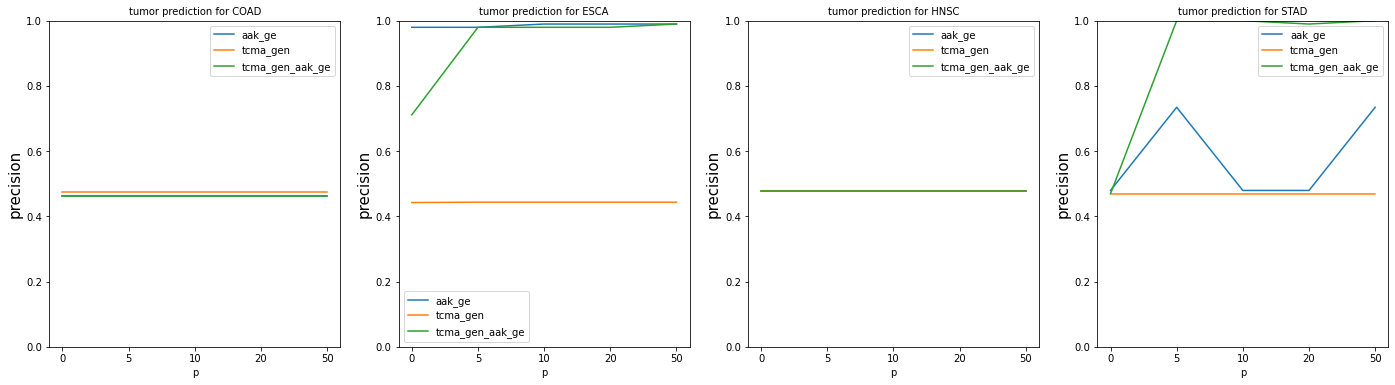

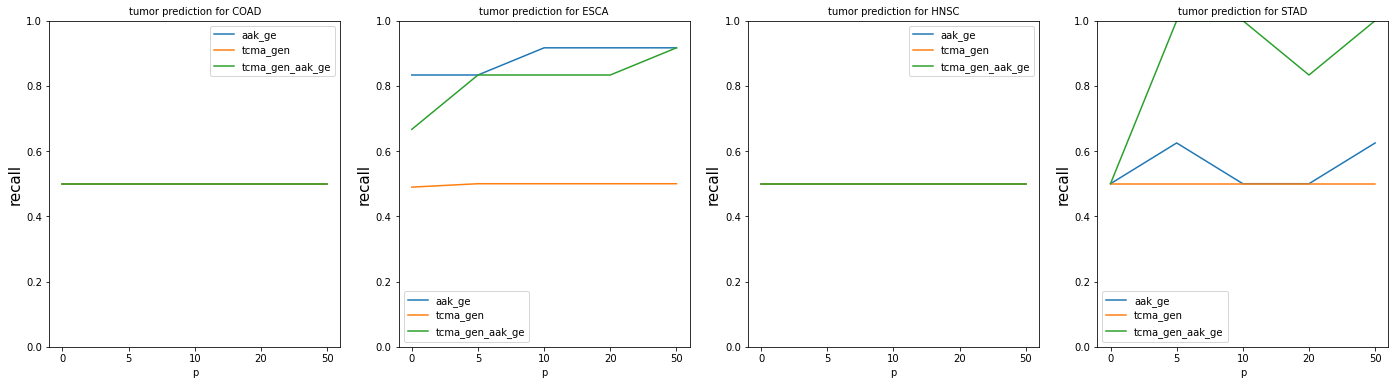

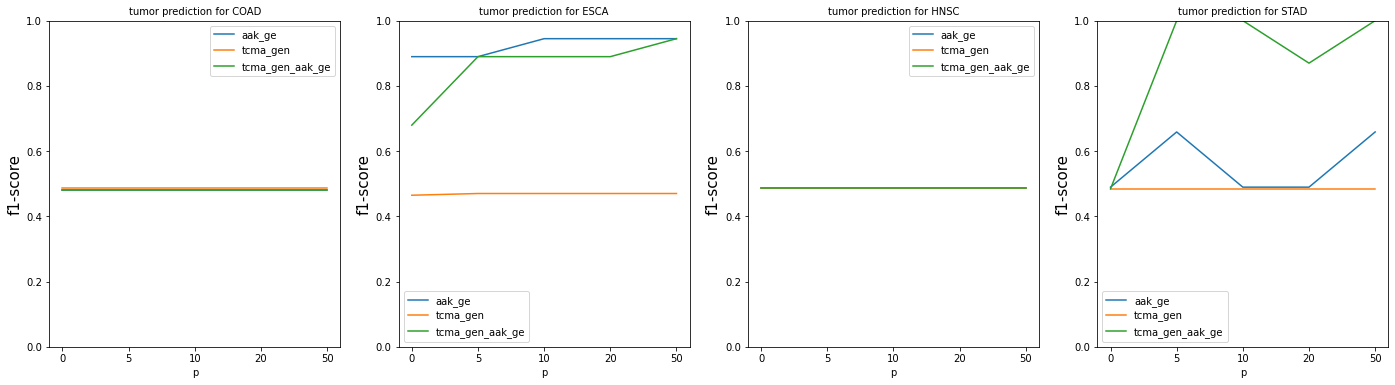

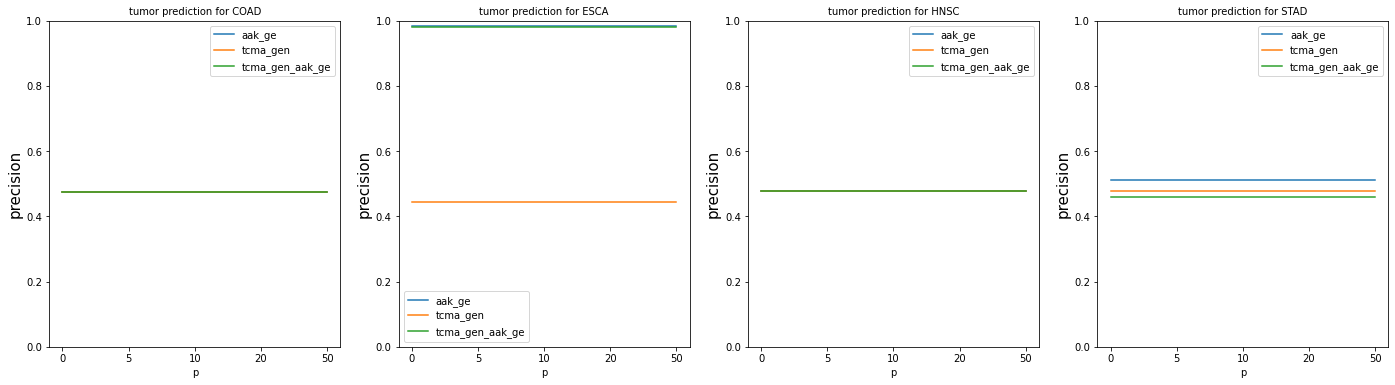

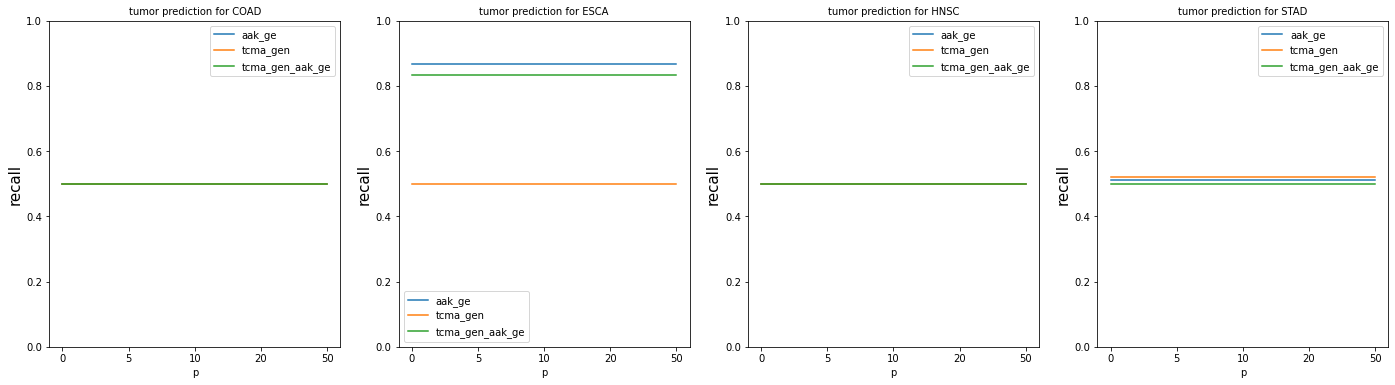

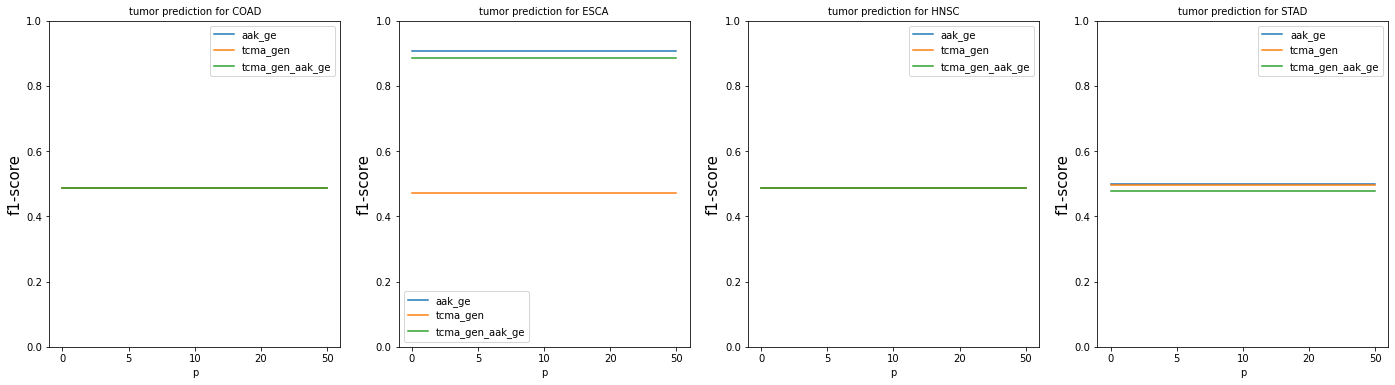

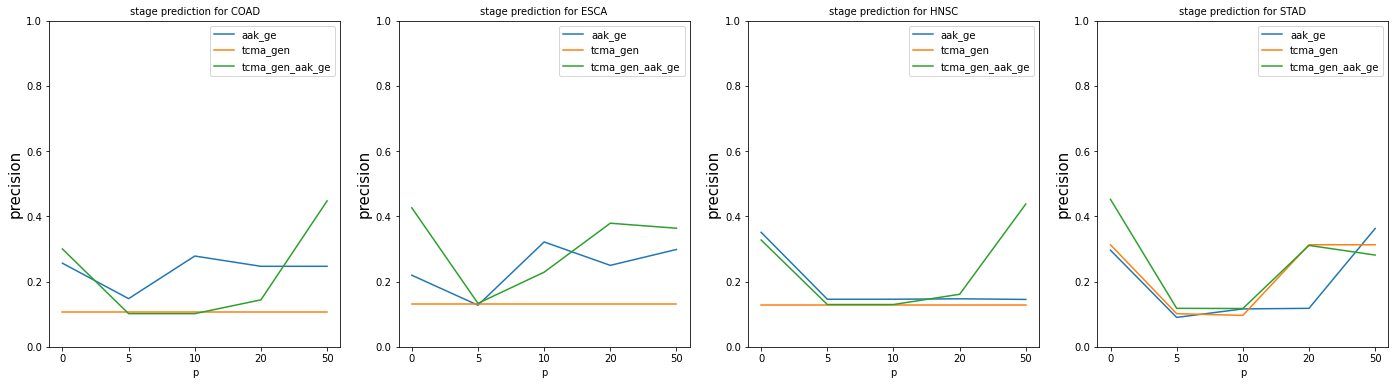

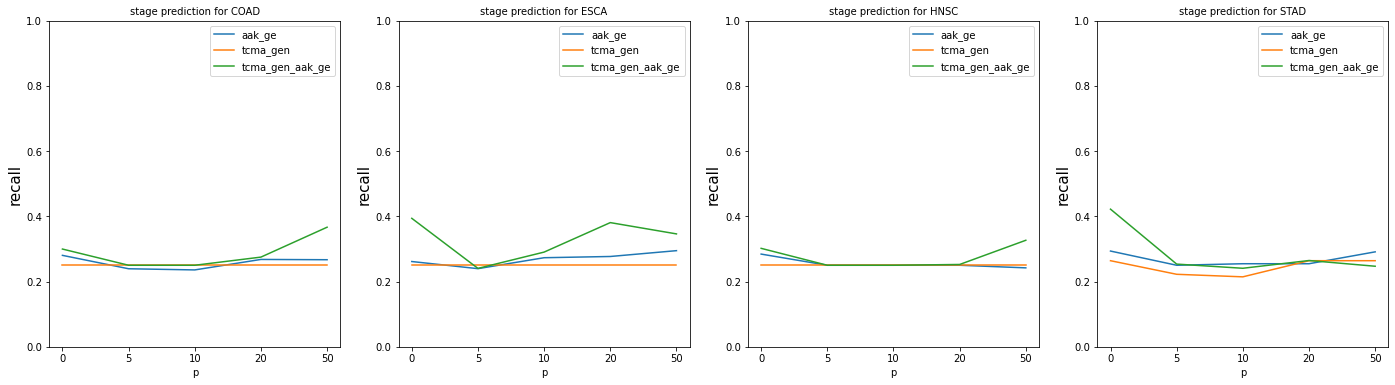

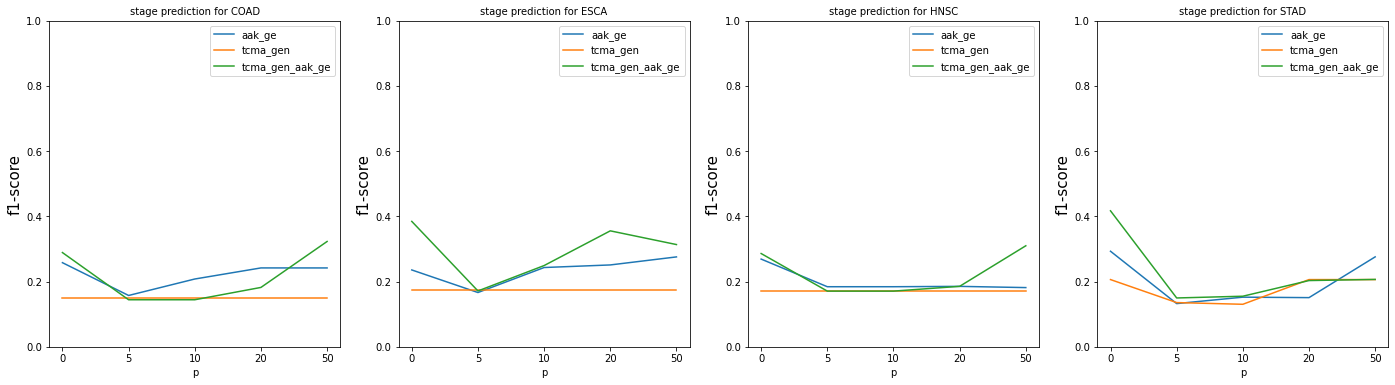

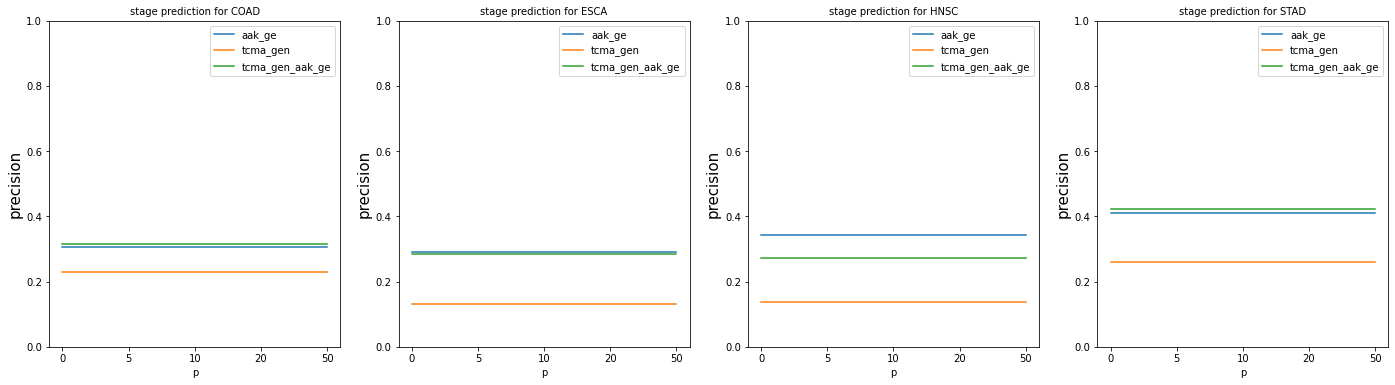

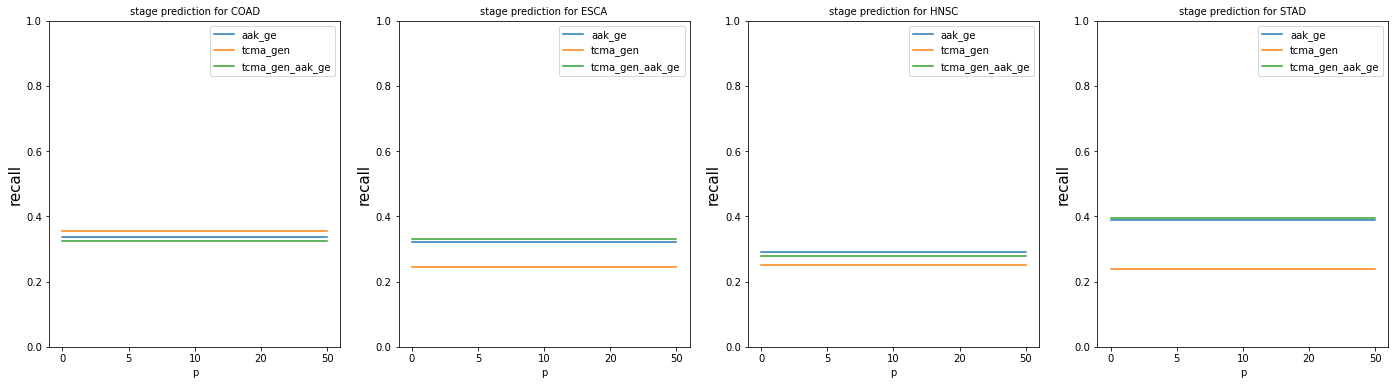

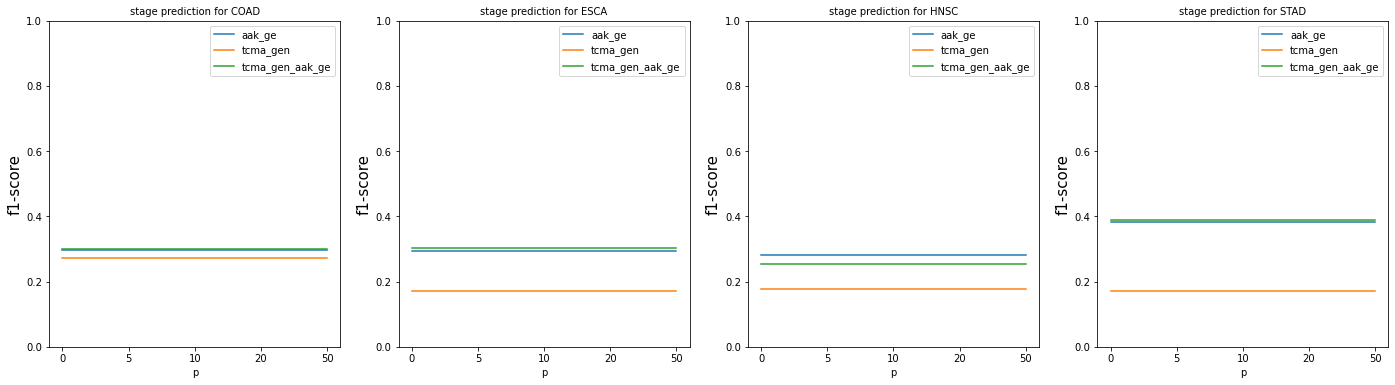

In [5]:
for target in config.prediction_targets:
    for sampling in config.sampling:
        files = ['aak_ge', 'tcma_gen', 'tcma_gen_aak_ge']
        data = [pd.read_csv(fr"Data\Descriptor\Prediction_Tables\{sampling}\{target}\{x}_pred.csv", index_col=None) for x in files]
        plot_prediction_metrics_for_data_types(data, files, sampling, target)

In [ ]:
data[0].head(5)
data[2]["cancer"].nunique()

In [ ]:
data, files = load.loadAll(includeStage=(target=="stage"), sameSamples=True)
files

In [ ]:
tcma_gen = data[0]
tcma_gen.head(1)
taxa = tcma_gen.iloc[:, :-2]
taxa_means = taxa.mean(axis=0)

# Remove zero values
taxa_means_nonzero = taxa_means.where(lambda x : x != 0).dropna()

print(f"Dropped {len(taxa_means) - len(taxa_means_nonzero)} zero rows")

ax = taxa_means_nonzero.plot(kind="bar", figsize=(50,10))

In [ ]:
taxa_fig = ax.get_figure()
taxa_fig.savefig("Visual/TCMA/tcma_genus_abundance.png", transparent=False, facecolor="white")